In [1]:
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
print(tf.__version__)

2.1.0


In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.feature_selection import variance_threshold

In [5]:
df = pd.read_csv(r"C:\Users\Rajesh\OneDrive\Documents\finalpreprocessed2.csv") 
df.head()

,Dur,Proto,Sport,Dport,TotPkts,TotBytes,SrcBytes,Label,State
0,0.055572,1,13485,1,2,128,60,0,1
1,0.097566,1,35155,10,2,474,145,0,1
2,3598.238525,1,43565,23,876,96819,47731,0,1
3,3591.619629,1,43565,23,867,95866,47068,0,1
4,1337.931763,1,44774,23,275,28434,12099,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025681 entries, 0 to 1025680
Data columns (total 9 columns):
Dur         1025681 non-null float64
Proto       1025681 non-null int64
Sport       1025681 non-null int64
Dport       1025681 non-null int64
TotPkts     1025681 non-null int64
TotBytes    1025681 non-null int64
SrcBytes    1025681 non-null int64
Label       1025681 non-null int64
State       1025681 non-null int64
dtypes: float64(1), int64(8)
memory usage: 70.4 MB


In [7]:
print(df.shape)
print("\n")
df.info()

(1025681, 9)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025681 entries, 0 to 1025680
Data columns (total 9 columns):
Dur         1025681 non-null float64
Proto       1025681 non-null int64
Sport       1025681 non-null int64
Dport       1025681 non-null int64
TotPkts     1025681 non-null int64
TotBytes    1025681 non-null int64
SrcBytes    1025681 non-null int64
Label       1025681 non-null int64
State       1025681 non-null int64
dtypes: float64(1), int64(8)
memory usage: 70.4 MB


In [8]:
# Determine number of fraud cases in dataset 
Botnet= df[df['Label'] == 1] 
Normal = df[df['Label'] == 0] 
outlierFraction = len(Botnet)/float(len(Normal)) 
print(outlierFraction) 
print("\n")
print('Fraud Cases: {}'.format(len(df[df['Label'] == 1]))) 
print('Valid Transactions: {}'.format(len(df[df['Label'] == 0]))) 

0.026917408559906125


Fraud Cases: 26885
Valid Transactions: 998796


In [9]:
print("Amount details of the Botnet Traffic") 
df[df['Label']==1].describe()

Amount details of the Botnet Traffic


,Dur,Proto,Sport,Dport,TotPkts,TotBytes,SrcBytes,Label,State
count,26885.000000,26885.000000,26885.000000,26885.000000,26885.000000,26885.000000,26885.000000,26885.0,26885.000000
mean,9.250071,1.196913,2231.884545,412.839316,3.969797,549.570504,206.900800,1.0,1.895890
std,103.058563,0.397673,638.083492,3525.908075,102.435016,9708.380705,4122.435199,0.0,2.259859
min,0.000000,1.000000,1025.000000,25.000000,1.000000,62.000000,62.000000,1.0,1.000000
25%,0.019557,1.000000,2077.000000,53.000000,2.000000,183.000000,71.000000,1.0,1.000000
50%,0.066952,1.000000,2077.000000,53.000000,2.000000,201.000000,74.000000,1.0,1.000000
75%,0.310549,1.000000,2079.000000,53.000000,2.000000,260.000000,80.000000,1.0,2.000000
max,3599.943115,2.000000,5000.000000,65520.000000,8645.000000,790233.000000,258900.000000,1.0,22.000000


In [10]:
print("details of  Normal Traffic") 
df[df['Label']==0].describe() 

details of  Normal Traffic


,Dur,Proto,Sport,Dport,TotPkts,TotBytes,SrcBytes,Label,State
count,998796.000000,998796.000000,998796.000000,998796.000000,9.987960e+05,9.987960e+05,9.987960e+05,998796.0,998796.000000
mean,478.425650,1.173243,37934.694771,8884.957119,2.455467e+01,1.921317e+04,4.453049e+03,0.0,2.099250
std,1048.031140,0.425711,18781.846433,12508.066439,3.740356e+03,3.980674e+06,2.653235e+06,0.0,2.844775
min,0.000000,1.000000,1.000000,1.000000,1.000000e+00,6.000000e+01,0.000000e+00,0.0,1.000000
25%,0.000309,1.000000,21810.000000,53.000000,2.000000e+00,2.140000e+02,7.800000e+01,0.0,1.000000
50%,0.001100,1.000000,42328.000000,443.000000,2.000000e+00,2.640000e+02,8.200000e+01,0.0,1.000000
75%,11.297167,1.000000,53455.000000,13363.000000,6.000000e+00,6.190000e+02,2.920000e+02,0.0,1.000000
max,3600.000000,6.000000,65535.000000,65535.000000,2.686731e+06,2.689640e+09,2.635366e+09,0.0,22.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A880B852E8>,
      dtype=object)

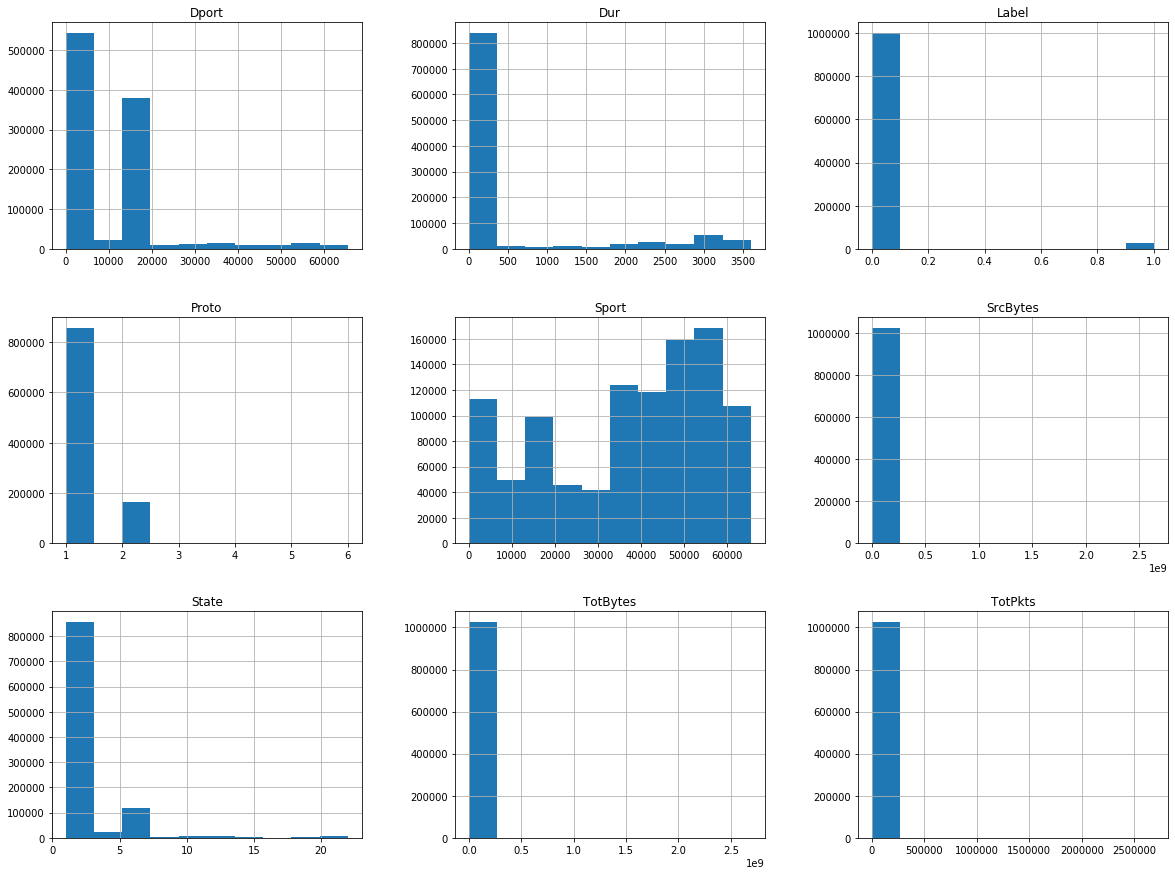

In [11]:
#plot histogram of each parameter
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(figsize = (20,15))

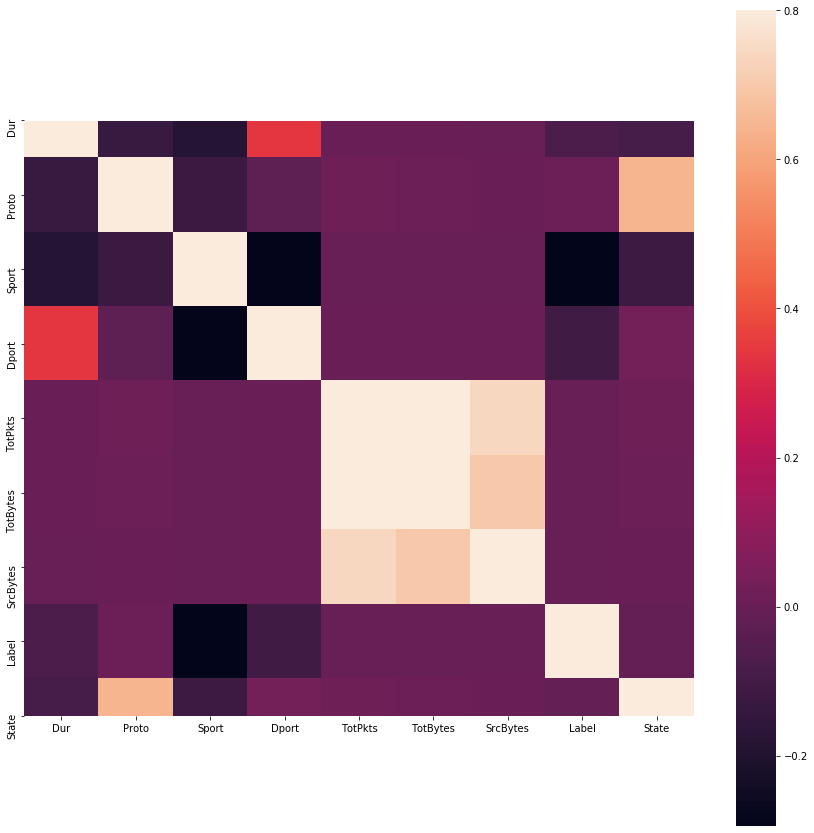

In [12]:
# Correlation matrix 
corrmat = df.corr() 
fig = plt.figure(figsize = (15, 15)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show()

In [13]:
X = df.drop(labels =['Label','State'],axis =1) 
X.shape

(1025681, 7)

In [14]:
y = df['Label']

In [15]:
#stratified shuffling is done to divide the data in equal ration on the basis of parameter label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 0, stratify =y)

In [16]:
X_train.shape

(820544, 7)

In [17]:
y_test.shape

(205137,)

In [18]:
cnt=0
for i in y_test:
  if i==1:
    cnt+=1
print(cnt)

5377


In [19]:
cnt=0
for i in y_train:
  if i==1:
    cnt+=1
print(cnt)

21508


In [20]:
from sklearn.feature_selection import VarianceThreshold 
filter = VarianceThreshold(0.01) 
X_train = filter.fit_transform(X_train) 
X_test = filter.transform(X_test) 
X_train.shape, X_test.shape 

((820544, 7), (205137, 7))

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train 

array([[ 2.50069123e+00, -4.09003823e-01,  1.27191267e+00, ...,
        -5.33356055e-03, -4.70500385e-03, -1.65548494e-03],
       [ 2.95269579e+00, -4.09003823e-01, -6.08799721e-01, ...,
        -4.26735702e-03, -4.63198144e-03, -1.61960052e-03],
       [-4.49697919e-01, -4.09003823e-01,  8.49697198e-01, ...,
        -5.86666232e-03, -4.69118175e-03, -1.67735734e-03],
       ...,
       [-4.49677298e-01,  1.94643748e+00, -1.82357793e+00, ...,
        -4.00080614e-03, -4.22801106e-03, -1.32979114e-03],
       [-4.49697951e-01, -4.09003823e-01,  4.01702298e-01, ...,
        -5.86666232e-03, -4.71908674e-03, -1.67838261e-03],
       [-4.49698002e-01, -4.09003823e-01,  2.32898603e-01, ...,
        -5.86666232e-03, -4.71908674e-03, -1.67838261e-03]])

In [22]:
X_test

array([[-4.49697958e-01, -4.09003823e-01, -1.59515850e-01, ...,
        -5.86666232e-03, -4.69718002e-03, -1.67872437e-03],
       [-4.49513184e-01, -4.09003823e-01,  1.11630804e+00, ...,
        -5.86666232e-03, -4.71960833e-03, -1.68077491e-03],
       [-4.49602137e-01, -4.09003823e-01, -5.04032126e-01, ...,
        -5.86666232e-03, -4.61320425e-03, -1.68043315e-03],
       ...,
       [-4.49697831e-01, -4.09003823e-01,  6.82027798e-01, ...,
        -5.86666232e-03, -4.71908674e-03, -1.67838261e-03],
       [ 2.79941782e+00, -4.09003823e-01, -1.85090412e+00, ...,
        -1.60184820e-03, -4.12525811e-03, -1.05741134e-03],
       [-4.49697332e-01, -4.09003823e-01,  1.04056808e+00, ...,
        -5.86666232e-03, -4.73942869e-03, -1.68009140e-03]])

In [23]:
X_train.shape,X_test.shape 

((820544, 7), (205137, 7))

In [24]:
X_train = X_train.reshape(820544,7,1) 
X_test = X_test.reshape(205137,7,1)

In [25]:
X_train.shape,X_test.shape 

((820544, 7, 1), (205137, 7, 1))

In [26]:
#as y is a series so y_train and y_test are also series therefore we need to convert them to a numpy array.
y_train = y_train.to_numpy() 
y_test = y_test.to_numpy()

In [27]:
from tensorflow.keras.layers import MaxPool1D
from keras.models import load_model
model = Sequential()
#model.add(LSTM(64,input_shape=(7,1),activation='relu',return_sequences=True))
#model.add(Dropout(0.1))
model.add(Conv1D(128,3,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(pool_size =2))
model.add(Dropout(0.1))

model = Sequential()
model.add(Conv1D(filters =256 ,kernel_size = 4,activation='relu',input_shape=(7,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.1))

model = Sequential()
model.add(Conv1D(350,4,activation='relu',input_shape=(7,1))) 
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.1))

model = Sequential()
model.add(Conv1D(256,4,activation='relu',input_shape=(7,1))) 
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation = 'sigmoid'))

Using TensorFlow backend.


In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 4, 256)            1280      
_________________________________________________________________
batch_normalization_3 (Batch (None, 4, 256)            1024      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 256)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 256)            0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [29]:
# compile the model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
#model.compile(optimizer=SGD(lr=0.00000005),loss ="binary_crossentropy",metrics = ['f1_score'])
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy']) 

#simple early stopping and model chekcpoint functions
es = EarlyStopping(monitor='val_loss',mode = 'min',verbose =1,patience = 75)
mc = ModelCheckpoint(r"C:\Users\Rajesh\OneDrive\Documents\best_model_neww3.h5",monitor = 'val_loss', mode = 'min', verbose =1, save_best_only = True)
lr = ReduceLROnPlateau(monitor = "val_loss", factor = 0.1, patience = 35, verbose = 0, mode = "min", min_delta= 1e-04, cooldown = 0,min_lr = 0)


In [30]:
history = model.fit(X_train,y_train,epochs = 500,validation_split=0.33 ,verbose =1,callbacks=[es,mc,lr])

Train on 549764 samples, validate on 270780 samples
Epoch 1/500
549600/549764 [============================>.] - ETA: 0s - loss: 0.0286 - accuracy: 0.9914
Epoch 00001: val_loss improved from inf to 0.02726, saving model to C:\Users\Rajesh\OneDrive\Documents\best_model_neww3.h5
549764/549764 [==============================] - 62s 112us/sample - loss: 0.0286 - accuracy: 0.9914 - val_loss: 0.0273 - val_accuracy: 0.9919
Epoch 2/500
549472/549764 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9919
Epoch 00002: val_loss improved from 0.02726 to 0.02474, saving model to C:\Users\Rajesh\OneDrive\Documents\best_model_neww3.h5
549764/549764 [==============================] - 64s 116us/sample - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0247 - val_accuracy: 0.9921
Epoch 3/500
549280/549764 [============================>.] - ETA: 0s - loss: 0.0252 - accuracy: 0.9921
Epoch 00003: val_loss improved from 0.02474 to 0.02362, saving model to C:\Users\Rajesh\OneDrive\Document

Epoch 26/500
549728/549764 [============================>.] - ETA: 0s - loss: 0.0167 - accuracy: 0.9941
Epoch 00026: val_loss did not improve from 0.01382
549764/549764 [==============================] - 121s 220us/sample - loss: 0.0167 - accuracy: 0.9941 - val_loss: 0.0186 - val_accuracy: 0.9938
Epoch 27/500
549696/549764 [============================>.] - ETA: 0s - loss: 0.0165 - accuracy: 0.9942
Epoch 00027: val_loss improved from 0.01382 to 0.01365, saving model to C:\Users\Rajesh\OneDrive\Documents\best_model_neww3.h5
549764/549764 [==============================] - 118s 215us/sample - loss: 0.0165 - accuracy: 0.9942 - val_loss: 0.0136 - val_accuracy: 0.9948
Epoch 28/500
549536/549764 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9942
Epoch 00028: val_loss did not improve from 0.01365
549764/549764 [==============================] - 117s 213us/sample - loss: 0.0162 - accuracy: 0.9942 - val_loss: 0.0146 - val_accuracy: 0.9943
Epoch 29/500
549568/549764 [==

Epoch 79/500
549632/549764 [============================>.] - ETA: 0s - loss: 0.0132 - accuracy: 0.9952
Epoch 00079: val_loss improved from 0.00946 to 0.00883, saving model to C:\Users\Rajesh\OneDrive\Documents\best_model_neww3.h5
549764/549764 [==============================] - 119s 216us/sample - loss: 0.0132 - accuracy: 0.9952 - val_loss: 0.0088 - val_accuracy: 0.9965
Epoch 80/500
549728/549764 [============================>.] - ETA: 0s - loss: 0.0131 - accuracy: 0.9952
Epoch 00080: val_loss did not improve from 0.00883
549764/549764 [==============================] - 119s 217us/sample - loss: 0.0131 - accuracy: 0.9952 - val_loss: 0.0090 - val_accuracy: 0.9978
Epoch 81/500
549504/549764 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9953
Epoch 00081: val_loss did not improve from 0.00883
549764/549764 [==============================] - 121s 220us/sample - loss: 0.0129 - accuracy: 0.9953 - val_loss: 0.0265 - val_accuracy: 0.9946
Epoch 82/500
549728/549764 [==

549728/549764 [============================>.] - ETA: 0s - loss: 0.0109 - accuracy: 0.9963
Epoch 00131: val_loss did not improve from 0.00600
549764/549764 [==============================] - 75s 137us/sample - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0067 - val_accuracy: 0.9989
Epoch 132/500
549600/549764 [============================>.] - ETA: 0s - loss: 0.0107 - accuracy: 0.9964
Epoch 00132: val_loss did not improve from 0.00600
549764/549764 [==============================] - 71s 129us/sample - loss: 0.0107 - accuracy: 0.9964 - val_loss: 0.0092 - val_accuracy: 0.9988
Epoch 133/500
549472/549764 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9955
Epoch 00133: val_loss did not improve from 0.00600
549764/549764 [==============================] - 77s 141us/sample - loss: 0.0123 - accuracy: 0.9955 - val_loss: 0.0127 - val_accuracy: 0.9953
Epoch 134/500
549312/549764 [============================>.] - ETA: 0s - loss: 0.0122 - accuracy: 0.9956
Epoch 00134: va

Epoch 184/500
549248/549764 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.9978
Epoch 00184: val_loss improved from 0.00515 to 0.00514, saving model to C:\Users\Rajesh\OneDrive\Documents\best_model_neww3.h5
549764/549764 [==============================] - 85s 155us/sample - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.0051 - val_accuracy: 0.9989
Epoch 185/500
549536/549764 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9977
Epoch 00185: val_loss did not improve from 0.00514
549764/549764 [==============================] - 85s 155us/sample - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0061 - val_accuracy: 0.9989
Epoch 186/500
549376/549764 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.9978
Epoch 00186: val_loss improved from 0.00514 to 0.00507, saving model to C:\Users\Rajesh\OneDrive\Documents\best_model_neww3.h5
549764/549764 [==============================] - 73s 134us/sample - loss: 0.0075 - accuracy: 0.9

Epoch 210/500
549568/549764 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9981
Epoch 00210: val_loss did not improve from 0.00476
549764/549764 [==============================] - 74s 134us/sample - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.0048 - val_accuracy: 0.9990
Epoch 211/500
549376/549764 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9982
Epoch 00211: val_loss did not improve from 0.00476
549764/549764 [==============================] - 71s 129us/sample - loss: 0.0066 - accuracy: 0.9982 - val_loss: 0.0049 - val_accuracy: 0.9990
Epoch 212/500
549664/549764 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9982
Epoch 00212: val_loss did not improve from 0.00476
549764/549764 [==============================] - 84s 152us/sample - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0052 - val_accuracy: 0.9990
Epoch 213/500
549280/549764 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9981
E

Epoch 264/500
549408/549764 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9982
Epoch 00264: val_loss did not improve from 0.00457
549764/549764 [==============================] - 72s 131us/sample - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 265/500
549312/549764 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9984
Epoch 00265: val_loss improved from 0.00457 to 0.00456, saving model to C:\Users\Rajesh\OneDrive\Documents\best_model_neww3.h5
549764/549764 [==============================] - 72s 131us/sample - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 266/500
549504/549764 [============================>.] - ETA: 0s - loss: 0.0059 - accuracy: 0.9984
Epoch 00266: val_loss did not improve from 0.00456
549764/549764 [==============================] - 72s 131us/sample - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 267/500
549568/549764 [=

Epoch 291/500
549632/549764 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9984
Epoch 00291: val_loss did not improve from 0.00450
549764/549764 [==============================] - 86s 157us/sample - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 292/500
549440/549764 [============================>.] - ETA: 0s - loss: 0.0059 - accuracy: 0.9984
Epoch 00292: val_loss did not improve from 0.00450
549764/549764 [==============================] - 72s 131us/sample - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 293/500
549664/549764 [============================>.] - ETA: 0s - loss: 0.0059 - accuracy: 0.9984
Epoch 00293: val_loss improved from 0.00450 to 0.00450, saving model to C:\Users\Rajesh\OneDrive\Documents\best_model_neww3.h5
549764/549764 [==============================] - 73s 134us/sample - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 294/500
549536/549764 [=

Epoch 318/500
549664/549764 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9985
Epoch 00318: val_loss did not improve from 0.00446
549764/549764 [==============================] - 72s 131us/sample - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 319/500
549280/549764 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9984
Epoch 00319: val_loss did not improve from 0.00446
549764/549764 [==============================] - 73s 133us/sample - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 320/500
549664/549764 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9984
Epoch 00320: val_loss did not improve from 0.00446
549764/549764 [==============================] - 80s 146us/sample - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 321/500
549280/549764 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9985
E

549696/549764 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9984
Epoch 00372: val_loss did not improve from 0.00446
549764/549764 [==============================] - 74s 135us/sample - loss: 0.0060 - accuracy: 0.9984 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 373/500
549536/549764 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9985
Epoch 00373: val_loss did not improve from 0.00446
549764/549764 [==============================] - 73s 133us/sample - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 374/500
549728/549764 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9985
Epoch 00374: val_loss did not improve from 0.00446
549764/549764 [==============================] - 74s 134us/sample - loss: 0.0058 - accuracy: 0.9985 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 375/500
549536/549764 [============================>.] - ETA: 0s - loss: 0.0059 - accuracy: 0.9985
Epoch 00375: va

In [32]:
#Recreate the exact same model, including its weights and the optimizer by loading our saved model.
model = tf.keras.models.load_model(r"C:\Users\Rajesh\OneDrive\Documents\best_model_neww3.h5")
#Show the model architecture
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 4, 256)            1280      
_________________________________________________________________
batch_normalization_3 (Batch (None, 4, 256)            1024      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 256)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 256)            0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [33]:
#evaluating the model 
trainloss,trainacc = model.evaluate(X_train,y_train,verbose=0)
testloss,testacc = model.evaluate(X_test,y_test,verbose=0)
print('train: trainacc= %.3f,trainloss= %.3f, Test: testacc= % .3f, testloss= %.3f'%(trainacc,trainloss,testacc,testloss))

train: trainacc= 0.999,trainloss= 0.004, Test: testacc=  0.999, testloss= 0.005


In [34]:
 y_predict = model.predict(X_test)

In [35]:
y_predict

array([[0.00000000e+00],
       [0.00000000e+00],
       [4.24130616e-35],
       ...,
       [0.00000000e+00],
       [1.33215125e-14],
       [0.00000000e+00]], dtype=float32)

In [36]:
history.history

{'loss': [0.028629404952914994,
  0.02609193581919555,
  0.025177080306320387,
  0.02444839802782789,
  0.023185718818917612,
  0.022744961607674846,
  0.021828973970955134,
  0.022120876888317854,
  0.021146802507618093,
  0.020757939896441032,
  0.020133435762339787,
  0.020199105117892704,
  0.020014602427368047,
  0.019691510234528677,
  0.019772970619835174,
  0.01890838508507875,
  0.018709754133638422,
  0.018339901053604495,
  0.01804553820210515,
  0.01815894543788629,
  0.017710644281978532,
  0.017520016679663842,
  0.017192209492054064,
  0.01697813291365534,
  0.016979621844901177,
  0.016693206242706607,
  0.016503568013385424,
  0.016203802867153595,
  0.015921406973203246,
  0.016135253171627565,
  0.015793598107821213,
  0.015900192758616587,
  0.01609667437171284,
  0.01544887330870375,
  0.01595305408926226,
  0.015220799617916458,
  0.015353859702741472,
  0.01531884849486068,
  0.015311302421837316,
  0.015581985061492429,
  0.015191888346794018,
  0.01514204040457

In [37]:
print(history.history['accuracy'])

[0.9914363, 0.991942, 0.992113, 0.9922458, 0.9926059, 0.9927005, 0.99297154, 0.99283147, 0.9931316, 0.99330986, 0.9934954, 0.99341536, 0.99346447, 0.9935027, 0.9936027, 0.9937064, 0.9937137, 0.99378276, 0.99377185, 0.99365544, 0.9939465, 0.99398834, 0.99399376, 0.9939847, 0.99394286, 0.99409384, 0.9941902, 0.99419934, 0.9942121, 0.9942011, 0.99423933, 0.99427027, 0.9941775, 0.9944121, 0.9942557, 0.994414, 0.9943521, 0.9944831, 0.9944267, 0.99439394, 0.99443036, 0.99438125, 0.9945176, 0.9943976, 0.9945686, 0.9945231, 0.9945067, 0.99449944, 0.9945686, 0.9946795, 0.9946577, 0.99464136, 0.99474865, 0.99481416, 0.9947614, 0.9949688, 0.99482507, 0.9948396, 0.9946759, 0.9948087, 0.9949269, 0.99479777, 0.9948614, 0.99459225, 0.99461406, 0.9948232, 0.99500877, 0.99487597, 0.9950397, 0.99496514, 0.99498874, 0.9950524, 0.994856, 0.99497056, 0.994996, 0.99474686, 0.99515975, 0.9952452, 0.99517065, 0.99524343, 0.9952725, 0.9952343, 0.99531436, 0.99520886, 0.9952689, 0.9950306, 0.99476504, 0.9949524

In [38]:
y_proba = model.predict_proba(X_test)

In [39]:
def plot_learningCurve(history,epoch):
  #ploting training & validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','test'],loc='right')
  plt.show()

#plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','test'],loc='right')
  plt.show()

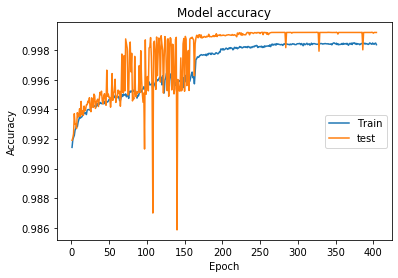

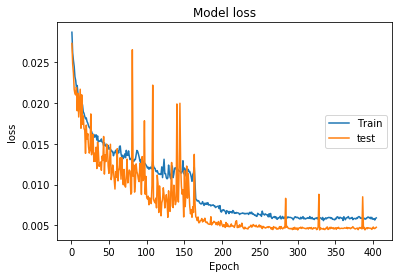

In [40]:
plot_learningCurve(history,404)

In [41]:
y_predict = np.asarray(y_predict)

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predict.round()))
print(classification_report(y_test.round(),y_predict.round()))

[[199701     59]
 [   120   5257]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199760
           1       0.99      0.98      0.98      5377

    accuracy                           1.00    205137
   macro avg       0.99      0.99      0.99    205137
weighted avg       1.00      1.00      1.00    205137



In [48]:
from sklearn.metrics import confusion_matrix
conff = confusion_matrix(y_test,y_predict.round())
conff

array([[199701,     59],
       [   120,   5257]], dtype=int64)

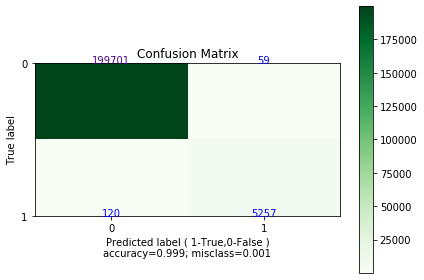

In [49]:
#Plotting Confusion matrix
import itertools
import matplotlib.pyplot as plt
classes = [0,1]
plt.imshow(conff,interpolation='nearest',cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes)
plt.yticks(tick_marks,classes)
accuracy = metrics.accuracy_score(y_test,y_predict.round())
misclass =1-accuracy
fmt ='d'
thresh = conff.max()/2
for i, j in itertools.product(range(conff.shape[0]),range(conff.shape[1])):
  plt.text(j,i,format(conff[i,j],fmt),horizontalalignment='center', color="indigo" if conff[i,j]>thresh else "blue")
  plt.tight_layout()
  plt.ylabel('True label')
  #plt.xlabel('Predicted label')
  plt.xlabel('Predicted label ( 1-True,0-False )\naccuracy={:0.3f}; misclass={:0.3f}'.format(accuracy, misclass))

In [50]:
TP = true_positives = 5257
TN = true_negatives = 554366
FP = false_positives = 59
FN = false_negatives = 120

In [52]:
#False Positive rate
FPR = FP/(TN+FP)
print("The flase positive rate of this model is{:.4f}".format(FPR))

The flase positive rate of this model is0.0001


In [53]:
#true negative rate
TNR = TN/(TN+FP)
print("The true negative rate of this model is{:.4f}".format(TNR))

The true negative rate of this model is0.9999


In [43]:
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
y_pred = y_predict.round()
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 


print("The model used is Deep Learning classifier")
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {:.2f}".format(acc)) 

prec = precision_score(y_test, y_pred) 
print("The precision is {:.2f}".format(prec)) 

rec = recall_score(y_test, y_pred) 
print("The recall is {:.2f}".format(rec)) 

f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {:.2f}".format(f1)) 

MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{:.2f}".format(MCC)) 

The model used is Deep Learning classifier
The accuracy is 1.00
The precision is 0.99
The recall is 0.98
The F1-Score is 0.98
The Matthews correlation coefficient is0.98


In [54]:
# Evaluating the classifier 
# printing every score of the classifier 
y_pred = y_predict.round()
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 


print("The model used is Deep Learning classifier")
acc = accuracy_score(y_test, y_pred) 
print("The accuracy is {:.6f}".format(acc)) 

prec = precision_score(y_test, y_pred) 
print("The precision is {:.6f}".format(prec)) 

rec = recall_score(y_test, y_pred) 
print("The recall is {:.6f}".format(rec)) 

f1 = f1_score(y_test, y_pred) 
print("The F1-Score is {:.6f}".format(f1)) 

MCC = matthews_corrcoef(y_test, y_pred) 
print("The Matthews correlation coefficient is{:.6f}".format(MCC)) 

The model used is Deep Learning classifier
The accuracy is 0.999127
The precision is 0.988901
The recall is 0.977683
The F1-Score is 0.983260
The Matthews correlation coefficient is0.982829


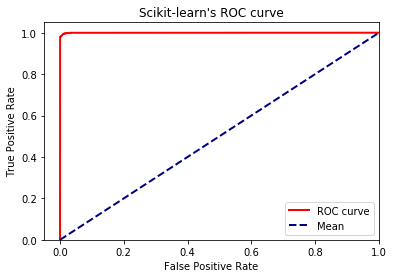

In [45]:
from sklearn import metrics
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red',lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

In [46]:
auc_score = metrics.roc_auc_score(y_test, y_proba)
print(f"Scikit's ROC-AUC score of DL model is {auc_score: .3f}")

Scikit's ROC-AUC score of DL model is  1.000


DL: f1=0.983 auc=1.000


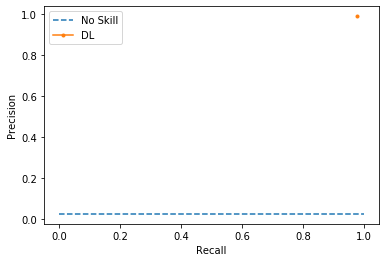

In [47]:
# precision-recall curve and f1
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
%matplotlib inline
# keep probabilities for the positive outcome only
#lr_probs = y_proba[:, 1]
# predict class values
yhat = y_predict
lr_precision, lr_recall = prec,rec
lr_f1,lr_auc = f1,auc_score
# summarize scores
print('DL: f1=%.3f auc=%.3f' % (lr_f1,lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='DL')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()